This notebook presents all the analysis reported in Study 4 of the paper.

Click the "Show Code" buttons to see the code associated with each output.

# Preamble

## Imports

In [1]:
# Misc
import warnings

warnings.filterwarnings("ignore")
from IPython.display import Markdown

# Data libraries
import pandas as pd
import numpy as np

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

sns.set_context("notebook")

# Statistics
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats.mstats import zscore
from statsmodels.stats.proportion import proportions_chisquare

STUDY_NAME = "Study 4"

## Functions

In [2]:
def plot_design(save=False, show=True, grayscale=False, figname=f"{STUDY_NAME} - Design"):
    # fmt: off
    prices_low_dispersion = np.array([240,260,260,280,280,280,300,300,300,
                                      300,320,320,320,320,320,340,340,340,
                                      340,360,360,360,380,380,400])   
    prices_high_dispersion = np.array([140,160,180,200,220,240,260,280,280,
                                       300,300,320,320,320,340,340,360,360,
                                       380,400,420,440,460,480,500])
    # fmt: on

    if grayscale:
        pal = sns.color_palette("Greys")[2::3]
        pathname = "Grayscale"
    else:
        pal = sns.color_palette()[0:2]
        pathname = "Color"

    if show:
        sns.set_context("notebook")
    else:
        sns.set_context("paper")

    sns.set_style("ticks")
    fig, ax = plt.subplots(1, figsize=(6.38, 4))
    ax.hist(
        prices_low_dispersion,
        bins=np.arange(120, 530, 20),
        histtype="bar",
        label="Equal dispersion",
        lw=0,
        align="left",
        rwidth=0.7,
        color=pal[0],
    )
    ax.hist(
        prices_high_dispersion,
        bins=np.arange(120, 530, 20),
        histtype="bar",
        label="Higher dispersion",
        lw=0,
        align="left",
        rwidth=0.3,
        color=pal[1],
    )
    sns.despine()
    ax.set_xlabel("Price Tag")
    ax.set_ylabel("Number of Flights Shown")
    ax.set_xticks(np.arange(120, 540, 40))
    ax.set_xticklabels(np.arange(120, 540, 40))

    ax.set_xticklabels([f"${x}" for x in np.arange(120, 540, 40)])

    plt.legend(frameon=False)
    sns.despine()
    plt.tight_layout()

    if save:
        plt.savefig(
            f"../Figures/{pathname}/{figname}.png", dpi=100, bbox_inches="tight"
        )
    if show:
        plt.show()
    else:
        plt.close()


def plot_minprice_cdf(
    data,
    save=False,
    show=True,
    grayscale=False,
    figname=f"Fig 5 - {STUDY_NAME} - CDF Min Price",
):
    if grayscale:
        pal = sns.color_palette("Greys")[2::3]
        pathname = "Grayscale"
    else:
        pal = sns.color_palette()[0:2]
        pathname = "Color"

    if show:
        sns.set_context("notebook")
    else:
        sns.set_context("paper")

    sns.set_style("ticks")
    kw = {"color": [pal[0], pal[1]]}
    g = sns.FacetGrid(
        hue="condition",
        data=data,
        aspect=1.5,
        height=6.38 / 1.5,
        hue_kws=kw,
        hue_order=["Equal dispersion", "Higher dispersion"],
    )
    g.map(
        plt.hist,
        "memory_min",
        histtype="step",
        align="mid",
        cumulative=True,
        density=True,
        bins=np.arange(0, 600, 10),
        lw=2,
    )
    g.set_xlabels("Cheapest Flight Reported")
    g.set_ylabels("Cumulative Proportion of Participants")

    g.ax.axvline(240, lw=1, color="grey", ls="-")
    g.ax.axvline(240, lw=1, color=pal[0], ls="--")
    g.ax.axvline(140, lw=1, color=pal[1], ls="--")
    g.ax.set_ylim(0, 1.1)
    g.ax.set_xlim(0, 500)
    g.ax.set_xticks(np.arange(0, 520, 40))
    g.ax.set_xticklabels([f"${i}" for i in np.arange(0, 520, 40)])

    legend_elements = [
        Line2D([0], [0], color="grey", ls="--", lw=2, label=f"True Min of Manipulated"),
        Line2D([0], [0], color=pal[0], lw=4, label="Equal (SD = 40)"),
        Line2D([0], [0], color="grey", ls="-", lw=1, label=f"True Min of Common"),
        Line2D([0], [0], color=pal[1], lw=4, label="Higher (SD = 90)"),
    ]

    g.ax.legend(
        handles=legend_elements,
        loc="center",
        ncol=2,
        frameon=True,
        bbox_to_anchor=(0.5, -0.25),
    )
    if save:
        plt.savefig(
            f"../Figures/{pathname}/{figname}.png", dpi=100, bbox_inches="tight"
        )
    if show:
        plt.show()
    else:
        plt.close()


def plot_lta_offer(
    data,
    save=False,
    show=True,
    grayscale=False,
    figname=f"Fig 6 - {STUDY_NAME} - Likelihood To Accept",
):
    if grayscale:
        pal = sns.color_palette("Greys")[2::3]
        pathname = "Grayscale"
    else:
        pal = sns.color_palette()[0:2]
        pathname = "Color"

    if show:
        sns.set_context("notebook")
    else:
        sns.set_context("paper")

    g = sns.catplot(
        x="offer",
        y="LTA",
        hue="condition",
        data=data,
        kind="point",
        units="turkid",
        order=[280, 260, 240, 220, 200],
        legend=False,
        height=6.38 / 1.5,
        aspect=1.5,
        markers=["o", "x"],
        linestyles=["-", "--"],
        hue_order=["Equal dispersion", "Higher dispersion"],
        palette=pal,
    )
    g.set_ylabels("Stated Likelihood to Accept (-3 to +3)")
    g.ax.set_xticklabels(["$280", "$260", "$240\n(True Min.)", "$220", "$200"])
    g.ax.set_xlabel("\nPrice Offered")
    g.ax.legend(
        title="Manipulated category had...",
        bbox_to_anchor=(0.22, 0.96),
        loc="upper center",
        frameon=False,
    )
    if save:
        plt.savefig(
            f"../Figures/{pathname}/{figname}.png", dpi=100, bbox_inches="tight"
        )
    if show:
        plt.show()
    else:
        plt.close()


def format_pvals(p):
    if p < 0.001:
        return "p < .001"
    else:
        return f"p = {p:.3f}"

## Data processing

In [3]:
df = pd.read_csv(f"../Data/{STUDY_NAME}/CleanData.csv")
df_long = pd.read_csv(f"../Data/{STUDY_NAME}/LongData.csv")

# Design

## Characteristics and distributions

We present participants with prices for two different types of flights:
* Flights to Colorado
* Flights to Florida

As in previous studies, we show 25 flights of each type, presented in a random order, for 1.2 seconds each.

We manipulate between-subjects the variance of the distributions:
* For half of the participants, the two types of flights have the same, small amount of price variance.
* For the other half, one type of flights has a large amount of price variance and the other has a small amount of price variance.

When the two distributions do not have the same amount of price variance, we counterbalance the "high price variance" distribution to be assigned to the "Colorado" or "Florida" flights.

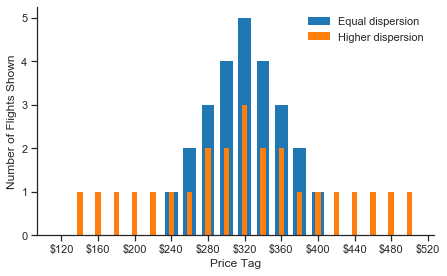

In [4]:
plot_design(save=False)

# Dependent Variables and Analysis

After they learn the distribution of prices, we instruct participants to focus on the prices of one type of flight (e.g. "flights to Florida") and to ignore the others (e.g. "flights to Colorado").
* If the participant saw two distributions with an equal amount of price variance, the distribution to ignore is chosen at random.
* If the participant saw two distributions with a different amount of price variance, the distribution to ignore is the one that had a large amount of price variance.

As such, regardless of the experimental condition they were assigned to, all the participants have to answer questions about a distribution that had a small amount of price variance. Normatively, the responses that they give should not differ between conditions: any significant deviation would be explained by an extraneous influence of the other distribution that they concurrently learned.

## Perception of the minimum value

We first ask participants to report the minimum value that they saw.

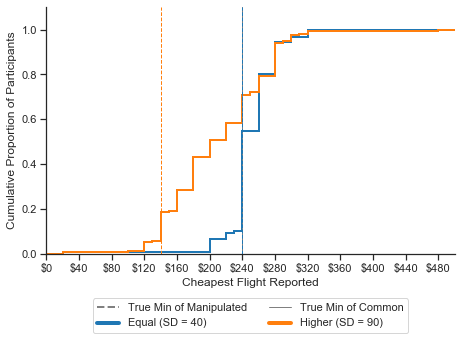

In [5]:
plot_minprice_cdf(df, grayscale=True, save=True, show=False)
plot_minprice_cdf(df, save=True)

In [6]:
results = smf.ols("memory_min ~ condition", data=df).fit()
results.summary(yname="Reported Min. Price", xname=["Intercept", "Higher dispersion"])

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Reported Min. Price   R-squared:                       0.145
Model:                             OLS   Adj. R-squared:                  0.142
Method:                  Least Squares   F-statistic:                     50.81
Date:                 Tue, 05 May 2020   Prob (F-statistic):           7.66e-12
Time:                         14:40:19   Log-Likelihood:                -1593.4
No. Observations:                  301   AIC:                             3191.
Df Residuals:                      299   BIC:                             3198.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           250.3800      3.946     63.445      0.000     242.614     258.146
Higher dispersion   -39.7177      5.572     -7.128      0.000     -50.683     -28.753
==============================================================================
Omnibus:                       36.845   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.581
Skew:                           0.092   Prob(JB):                     1.15e-51
Kurtosis:                       7.321   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Standardized betas:

In [7]:
stdbetas = results.params / df.memory_min.std(ddof=1)
stdbetas.index = ["Intercept", "Higher dispersion"]
table = pd.DataFrame(stdbetas, columns=["Standardized Betas"])
table.style.format("{:.2f}")

,Standardized Betas
Intercept,4.80
Higher dispersion,-0.76


## Proportion of responses below true min

Looking at the CDF of responses, we find a very different pattern between conditions:
* In the "Equal dispersion" condition, the likelihood of reporting a price below the true minimum price ($240) is extremely low.
* In the "Higher dispersion" condition, this likelihood is significantly higher, and only drops at the true minimum price of the other distribution.

In [8]:
nobs = df.groupby("condition").below_true_min.count()
nsuc = df.groupby("condition").below_true_min.sum()
props = nsuc / nobs * 100
chi, p = proportions_chisquare(nsuc[[0, 1]], nobs[[0, 1]])[0:2]
Markdown(
    f"""Proportion below actual min: {props[0]:.0f}% vs. {props[1]:.0f}%: $\chi$(1) = {chi:.2f}, {format_pvals(p)}; 
"""
)

Proportion below actual min: 10% vs. 58%: $\chi$(1) = 77.92, p < .001; 


## Likelihood to accept offers

After asking this question, we investigate the downstream consequences of those perceptions on consumers' likelihood to search for a better price.

We asked respondents to imagine seeing a flight costing \\$280, and to indicate their likelihood to accept this price on a scale from -3 (definitely search for a better price) to +3 (definitely accept the deal). 

We repeated this question for four other prices: \\$260, \\$240 (the true minimum price), \\$220 and \\$200.

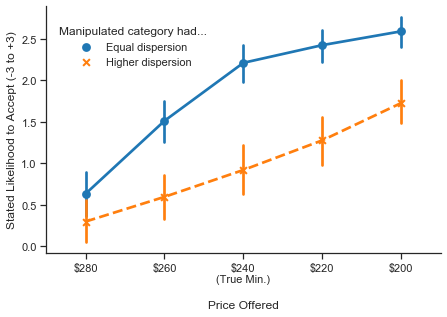

In [9]:
plot_lta_offer(df_long, save=True, grayscale=True, show=False)
plot_lta_offer(df_long, save=True, show=True)

This reveals a significant impact of the variance of the other distribution: across the board, participants are more likely to accept the offer when they concurrently learned another distribution that had more extreme prices.

In [10]:
model_lta = smf.mixedlm(
    "LTA ~ C(condition)", data=df_long, groups=df_long.turkid, eval_env=2
).fit()
model_lta.summary(
    yname="Likelihood to Accept",
    xname_fe=["Intercept", "Condition: More variance (dummy-coded)"],
    xname_re=["Participants Random Effect"],
)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Mixed Linear Model Regression Results
=================================================================================
Model:                 MixedLM      Dependent Variable:      Likelihood to Accept
No. Observations:      1505         Method:                  REML                
No. Groups:            301          Scale:                   1.1738              
Min. group size:       5            Log-Likelihood:          -2575.6218          
Max. group size:       5            Converged:               Yes                 
Mean group size:       5.0                                                       
---------------------------------------------------------------------------------
                                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------
Intercept                               1.876    0.114 16.485 0.000  1.653  2.099
Condition: More variance (dummy-coded) -0.912    0.161 -5.675 0.000 -1.227 -0.597
Participants Random Effect              1.708    0.164                           
=================================================================================

"""

Standardized betas:

In [11]:
stdbetas = model_lta.params / df_long.LTA.std(ddof=1)
stdbetas.index = [
    "Intercept",
    "Condition: More variance (dummy-coded)",
    "Participants Random Effect",
]
table = pd.DataFrame(stdbetas, columns=["Standardized Betas"])
table.style.format("{:.2f}")

,Standardized Betas
Intercept,1.07
Condition: More variance (dummy-coded),-0.52
Participants Random Effect,0.83


We also notice an interaction effect, consistent with participants' perception of the minimum price:
* In the "As much variance" condition, any decrease below the true minimum price has a small effect on participants' willingness to accept the deal (as the majority of people are already certain to accept the deal)
* In the "More variance" condition, we do not observe this attenuation (as the offer might not be below the minimum price that they perceive).

In [12]:
df_long["discount"] = (df_long.offer.max() - df_long.offer) / 20
df_long["offer_lower_than_min"] = (df_long.offer < 240) * 1
model_3way = smf.mixedlm(
    "LTA ~ condition*discount*offer_lower_than_min", data=df_long, groups=df_long.turkid
).fit()
xname_fe = [
    "Intercept",
    "Condition: Higher dispersion",
    "Discount: -$20",
    "Condition \u2a2f Discount",
    "Below Min. Price",
    "Condition \u2a2f Below Min. Price",
    "Discount \u2a2f Below Min. Price",
    "Condition \u2a2f Discount \u2a2f Below Min. Price",
]
model_3way.summary(
    xname_fe=xname_fe,
    xname_re=["Participants Random Effect"],
    yname="Likelihood to Accept",
)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Mixed Linear Model Regression Results
==================================================================================
Model:                  MixedLM      Dependent Variable:      Likelihood to Accept
No. Observations:       1505         Method:                  REML                
No. Groups:             301          Scale:                   0.6946              
Min. group size:        5            Log-Likelihood:          -2267.5572          
Max. group size:        5            Converged:               Yes                 
Mean group size:        5.0                                                       
----------------------------------------------------------------------------------
                                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------
Intercept                                0.663    0.126  5.263 0.000  0.416  0.910
Condition: Higher dispersion            -0.370    0.178 -2.078 0.038 -0.718 -0.021
Discount: -$20                           0.790    0.048 16.419 0.000  0.696  0.884
Condition ⨯ Discount                    -0.479    0.068 -7.047 0.000 -0.612 -0.346
Below Min. Price                         1.263    0.346  3.653 0.000  0.585  1.941
Condition ⨯ Below Min. Price            -1.630    0.488 -3.338 0.001 -2.587 -0.673
Discount ⨯ Below Min. Price             -0.623    0.108 -5.794 0.000 -0.834 -0.412
Condition ⨯ Discount ⨯ Below Min. Price  0.762    0.152  5.019 0.000  0.465  1.060
Participants Random Effect               1.804    0.213                           
==================================================================================

"""

In [13]:
stdbetas = model_3way.params / df_long.LTA.std(ddof=1)
stdbetas.index = xname_fe + ["Participants Random Effect"]
table = pd.DataFrame(stdbetas, columns=["Standardized Betas"])
table.style.format("{:.2f}")

,Standardized Betas
Intercept,0.38
Condition: Higher dispersion,-0.21
Discount: -$20,0.45
Condition ⨯ Discount,-0.27
Below Min. Price,0.72
Condition ⨯ Below Min. Price,-0.93
Discount ⨯ Below Min. Price,-0.36
Condition ⨯ Discount ⨯ Below Min. Price,0.43
Participants Random Effect,1.48


In [14]:
varnames = model_3way.params.index.values[2:8]
betas = model_3way.params.values[2:8]
vcv = model_3way.cov_params().values[2:8, 2:8]
grads = np.array(
    [  # Matrix of values to obtain the conditional effects of the discount:
        [1, 0, 0, 0, 0, 0],  # Discount "Equal dispersion" condition above min. price
        [
            1,
            0,
            0,
            0,
            1,
            0,
        ],  # Discount in "Equal dispersion" condition below true min. price
        [0, 0, 0, 0, 1, 0],  # Value of interaction in "Equal dispersion"
        [
            1,
            1,
            0,
            0,
            0,
            0,
        ],  # Discount in "Higher dispersion" condition above true min. price
        [
            1,
            1,
            0,
            0,
            1,
            1,
        ],  # Discount in "Higher dispersion" condition below true min. price
        [0, 0, 0, 0, 1, 1],  # Value of interaction in "Higher dispersion"
    ]
)
b = []
se = []
for g in grads:
    b.append(betas @ g)  # Conditional effects
    se.append(g @ vcv @ g)
se = np.sqrt(se)  # SE of conditional effects
z = b / se  # z-scores of conditional effects
pvals = [
    f"{i:.4f}" for i in stats.norm.sf(np.abs(z)) * 2
]  # p-values of conditional effects
standardb = np.array(b) / df_long.LTA.std(ddof=1)
result_table = pd.DataFrame(
    {
        "Effect": [
            "Equal dispersion, Above min. price",
            "Equal dispersion, Below min. price",
            "Equal dispersion: Interaction",
            "Higher dispersion, Above min. price",
            "Higher dispersion, Below min. price",
            "Higher disperison: Above vs. Below",
        ],
        "b": b,
        "SE": se,
        "z-score": z,
        "p-values": pvals,
        "Std b": standardb,
    }
)
result_table.set_index("Effect")

,b,SE,z-score,p-values,Std b
Effect,,,,,
"Equal dispersion, Above min. price",0.790000,0.048116,16.418501,0.0000,0.450243
"Equal dispersion, Below min. price",0.166667,0.096233,1.731909,0.0833,0.094988
Equal dispersion: Interaction,-0.623333,0.107592,-5.793510,0.0000,-0.355255
"Higher dispersion, Above min. price",0.311258,0.047957,6.490381,0.0000,0.177395
"Higher dispersion, Below min. price",0.450331,0.095914,4.695169,0.0000,0.256657
Higher disperison: Above vs. Below,0.139073,0.107235,1.296900,0.1947,0.079262


An alternative specification, considering all choices, yields the same conclusion:

In [15]:
l = np.arange(200, 300, 20)
l = l[::-1]
model = smf.mixedlm(
    "LTA ~ C(condition)*C(offer, Diff, levels=l)",
    data=df_long,
    groups=df_long.turkid,
    eval_env=2,
).fit()
xname_fe = [
    "Intercept",
    "Condition: More variance (dummy-coded)",
    "Price: 260 vs. 280",
    "Price: 240 vs. 260",
    "Price: 220 vs. 240",
    "Condition \u2a2f Price: 260 vs. 280",
    "Condition \u2a2f Price: 200 vs. 220",
    "Condition \u2a2f Price: 240 vs. 260",
    "Condition \u2a2f Price: 220 vs. 240",
    "Condition \u2a2f Price: 200 vs. 220",
]
model.summary(xname_fe=xname_fe, yname="Likelihood to Accept")

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Mixed Linear Model Regression Results
=================================================================================
Model:                 MixedLM      Dependent Variable:      Likelihood to Accept
No. Observations:      1505         Method:                  REML                
No. Groups:            301          Scale:                   0.6950              
Min. group size:       5            Log-Likelihood:          -2268.7101          
Max. group size:       5            Converged:               Yes                 
Mean group size:       5.0                                                       
---------------------------------------------------------------------------------
                                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------
Intercept                               1.876    0.114 16.485 0.000  1.653  2.099
Condition: More variance (dummy-coded) -0.912    0.161 -5.675 0.000 -1.227 -0.597
Price: 260 vs. 280                      0.880    0.096  9.141 0.000  0.691  1.069
Price: 240 vs. 260                      0.700    0.096  7.272 0.000  0.511  0.889
Price: 220 vs. 240                      0.213    0.096  2.216 0.027  0.025  0.402
Condition ⨯ Price: 260 vs. 280          0.167    0.096  1.731 0.083 -0.022  0.355
Condition ⨯ Price: 200 vs. 220         -0.582    0.136 -4.282 0.000 -0.848 -0.316
Condition ⨯ Price: 240 vs. 260         -0.375    0.136 -2.763 0.006 -0.642 -0.109
Condition ⨯ Price: 220 vs. 240          0.144    0.136  1.062 0.288 -0.122  0.411
Condition ⨯ Price: 200 vs. 220          0.284    0.136  2.087 0.037  0.017  0.550
Group Var                               1.804    0.213                           
=================================================================================

"""

In [16]:
varnames = model.params.index.values
betas = model.params.values
vcv = model.cov_params().values
b = [betas[2], betas[3], betas[4], betas[5]]
se = [vcv[2, 2], vcv[3, 3], vcv[4, 4], vcv[5, 5]]
for v in ["280", "260", "240", "220"]:
    grad = [1 if v in x else 0 for x in varnames]
    b.append(betas @ grad)
    se.append(grad @ vcv @ grad)
se = np.sqrt(se)  # SE of conditional effects
z = b / se  # z-scores of conditional effects
pvals = [
    f"{i:.4f}" for i in stats.norm.sf(np.abs(z)) * 2
]  # p-values of conditional effects
standardb = np.array(b) / df_long.LTA.std(ddof=1)
result_table = pd.DataFrame(
    {
        "Effect": [
            "Equal dispersion: \$260 vs. \$280",
            "Equal dispersion: \$240 vs. \$260",
            "Equal dispersion: \$220 vs. \$240",
            "Equal dispersion: \$200 vs. \$220",
            "Higher dispersion: \$260 vs. \$280",
            "Higher dispersion: \$240 vs. \$260",
            "Higher dispersion: \$220 vs. \$240",
            "Higher dispersion: \$200 vs. \$220",
        ],
        "$\\beta$": b,
        "SE": se,
        "z-score": z,
        "p-values": pvals,
        "Std $\\beta$": standardb,
    }
)
result_table.set_index("Effect")

,$\beta$,SE,z-score,p-values,Std $\beta$
Effect,,,,,
Equal dispersion: \$260 vs. \$280,0.880000,0.096265,9.141393,0.0000,0.501537
Equal dispersion: \$240 vs. \$260,0.700000,0.096265,7.271563,0.0000,0.398950
Equal dispersion: \$220 vs. \$240,0.213333,0.096265,2.216095,0.0267,0.121585
Equal dispersion: \$200 vs. \$220,0.166667,0.096265,1.731324,0.0834,0.094988
Higher dispersion: \$260 vs. \$280,0.298013,0.095946,3.106048,0.0019,0.169846
Higher dispersion: \$240 vs. \$260,0.324503,0.095946,3.382141,0.0007,0.184944
Higher dispersion: \$220 vs. \$240,0.357616,0.095946,3.727257,0.0002,0.203815
Higher dispersion: \$200 vs. \$220,0.450331,0.095946,4.693583,0.0000,0.256657


# Robustness Checks: Consistent participants only

Participants' likelihood to accept the price should be increasing as the prices offered decrease. Is it always the case?

In [17]:
df_long_clean = df_long[df_long.has_consistent_prefs]
excluded = int(df_long.shape[0] / 5 - df_long_clean.shape[0] / 5)
total = int(df_long.shape[0] / 5)
Markdown(
    f"""
No, {excluded} participants (out of {total}) have at least one linearity violation. Excluding those participants give identical results:
"""
)


No, 51 participants (out of 301) have at least one linearity violation. Excluding those participants give identical results:


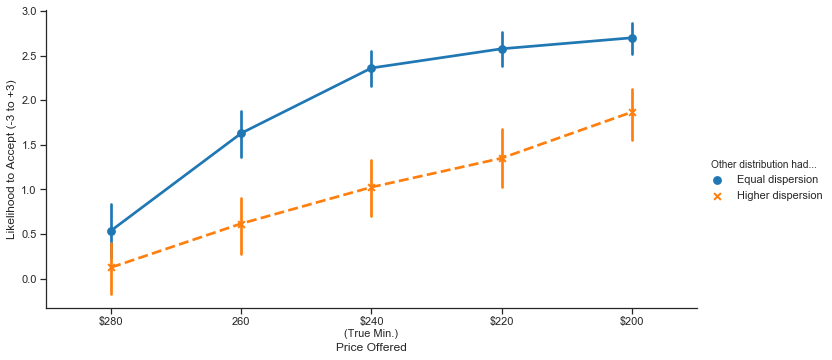

In [18]:
g = sns.catplot(
    x="offer",
    y="LTA",
    hue="condition",
    data=df_long_clean,
    kind="point",
    units="turkid",
    order=[280, 260, 240, 220, 200],
    legend=False,
    markers=["o", "x"],
    linestyles=["-", "--"],
    hue_order=["Equal dispersion", "Higher dispersion"],
    aspect=2,
)
g.ax.set_xticklabels(["$280", "260", "$240\n(True Min.)", "$220", "$200"])
g.ax.set_xlabel("Price Offered")
g.set_ylabels("Likelihood to Accept (-3 to +3)")
g.add_legend(title="Other distribution had...");

In [19]:
model = smf.mixedlm(
    "LTA ~ condition", data=df_long_clean, groups=df_long_clean.turkid, eval_env=2
).fit()
model.summary(
    yname="Likelihood to Accept",
    xname_fe=["Intercept", "Condition: More variance (dummy-coded)"],
    xname_re=["Participants Random Effect"],
)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Mixed Linear Model Regression Results
=================================================================================
Model:                 MixedLM      Dependent Variable:      Likelihood to Accept
No. Observations:      1250         Method:                  REML                
No. Groups:            250          Scale:                   1.1688              
Min. group size:       5            Log-Likelihood:          -2133.0043          
Max. group size:       5            Converged:               Yes                 
Mean group size:       5.0                                                       
---------------------------------------------------------------------------------
                                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------
Intercept                               1.962    0.120 16.318 0.000  1.726  2.197
Condition: More variance (dummy-coded) -0.965    0.174 -5.561 0.000 -1.305 -0.625
Participants Random Effect              1.645    0.174                           
=================================================================================

"""

In [20]:
model_3way = smf.mixedlm(
    "LTA ~ condition*discount*offer_lower_than_min",
    data=df_long_clean,
    groups=df_long_clean.turkid,
).fit()
xname_fe = [
    "Intercept",
    "Condition: Higher dispersion",
    "Discount: -$20",
    "Condition \u2a2f Discount",
    "Below Min. Price",
    "Condition \u2a2f Below Min. Price",
    "Discount \u2a2f Below Min. Price",
    "Condition \u2a2f Discount \u2a2f Below Min. Price",
]
model_3way.summary(
    xname_fe=xname_fe,
    xname_re=["Participants Random Effect"],
    yname="Likelihood to Accept",
)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Mixed Linear Model Regression Results
==================================================================================
Model:                  MixedLM      Dependent Variable:      Likelihood to Accept
No. Observations:       1250         Method:                  REML                
No. Groups:             250          Scale:                   0.5422              
Min. group size:        5            Log-Likelihood:          -1756.9418          
Max. group size:        5            Converged:               Yes                 
Mean group size:        5.0                                                       
----------------------------------------------------------------------------------
                                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------
Intercept                                0.599    0.131  4.580 0.000  0.342  0.855
Condition: Higher dispersion            -0.460    0.189 -2.437 0.015 -0.830 -0.090
Discount: -$20                           0.912    0.046 19.961 0.000  0.822  1.001
Condition ⨯ Discount                    -0.462    0.066 -7.002 0.000 -0.591 -0.332
Below Min. Price                         1.609    0.328  4.902 0.000  0.966  2.252
Condition ⨯ Below Min. Price            -1.948    0.474 -4.111 0.000 -2.876 -1.019
Discount ⨯ Below Min. Price             -0.788    0.102 -7.722 0.000 -0.989 -0.588
Condition ⨯ Discount ⨯ Below Min. Price  0.855    0.147  5.802 0.000  0.566  1.144
Participants Random Effect               1.770    0.256                           
==================================================================================

"""

All the conclusions are unchanged when considering this subset of participants.